# Example Growth Charts

Work to show the possible examples.

In [1]:
from __future__ import print_function

In [ ]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import time

import matplotlib as mpl

import datetime






In [3]:

f = open('data/gamelogs.dat')



zero_day = 75
max_day = 300


DDStats = {}

for line in f:
    q = [d.strip(" ") for d in line.split(';')]
    
    if q[0] not in DDStats.keys():
        DDStats[q[0]] = {}
        
    if q[1] not in DDStats[q[0]].keys():
        
        if q[0] in ['OPP','POS']:
            DDStats[q[0]][q[1]] = np.zeros(max_day-zero_day,dtype='S5')
            
        else:
            DDStats[q[0]][q[1]] = np.zeros(max_day-zero_day)
        
    for indx in range(0,len(q)-3):
        #print(q[0],q[1],q[indx+2])
        
        if q[0] in ['OPP','POS']:
            DDStats[q[0]][q[1]][indx] = q[indx+2]

        else:
            try:
                DDStats[q[0]][q[1]][indx] = float(q[indx+2])
            except:
                DDStats[q[0]][q[1]][indx] = 0.
    


f.close()


print(DDStats.keys())

['OPP', 'BB', 'HR', 'H', 'BO', 'POS', 'PA', 'SO', 'RBI', 'SB', 'R']


In [8]:
# reorganize with game numbers

zero_day = 75
max_day = 300

GStats = {}

for key1 in DDStats.keys():
    
    GStats[key1] = {}
    
    for key2 in DDStats[key1].keys():
        
        if key1 in ['OPP','POS']:
            GStats[key1][key2] = np.zeros(max_day-zero_day,dtype='S5')
            
        else:
            GStats[key1][key2] = np.zeros(max_day-zero_day) + np.nan
            
        gnum = 0
        for indx,val in enumerate(DDStats[key1][key2]):
            
            if DDStats['POS'][key2][indx] != '':
                GStats[key1][key2][gnum] = DDStats[key1][key2][indx]
                gnum += 1
                


In [9]:
print(GStats['PA']['Joey Votto'])

[  4.   3.   4.   4.   3.   5.   5.   5.   5.   4.   4.   5.   4.   5.   4.
   4.   5.   5.   4.   5.   3.   4.   5.   5.   4.   4.   4.   4.   6.   4.
   4.   4.   4.   4.   8.   5.   4.   5.   5.   5.   3.   5.   4.   4.   5.
   5.   4.   5.   4.   3.   5.   4.   4.   6.   5.   4.   4.   4.   4.   4.
   4.   5.   4.   4.   4.   4.   5.   5.   5.   5.   4.   5.   2.   5.   4.
   4.   4.   3.   4.   4.   4.   4.   5.   5.   5.   4.   5.   4.   4.   3.
   4.   4.   4.   6.   4.   4.   5.   4.   4.   4.   4.   5.   4.   4.   5.
   5.   5.   4.   4.   4.   2.   4.   4.   5.   5.   6.   5.   5.   5.   5.
   4.   6.   5.   5.   4.   5.   4.   4.   5.   4.   5.   6.   4.   4.   4.
   4.   4.   4.   5.   4.   4.   4.   4.   5.   4.   4.   4.   4.   3.   4.
   5.   4.   5.   5.   4.   4.   5.   5.   4.   4.   4.   4.  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  

### Open Questions

1. How to treat DL?
2. How to treat off days?

### Desired Functionality

1. By batting order
2. By position
3. By age
4. By opponent?

In [ ]:
PAlist = np.zeros([len(np.array(DDStats['PA'].keys())),max_day-zero_day])


stat = 'RBI'
print(len(np.array(DDStats[stat].keys())) )

for indx,player in enumerate(DDStats[stat].keys()):
    PAlist[indx] = np.cumsum(DDStats[stat][player])


fig = plt.figure()
ax = fig.add_axes([0.18,0.22,0.6,0.7])
ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
for perc in range(100,0,-10):
    ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))
    

ax.plot(np.cumsum(DDStats[stat]['Whit Merrifield']),color='black')

    
ax.set_ylabel('RBIs',size=18)
ax.set_xlabel('Gameday Number',size=18)
    
cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)





(array([ 0, 25, 26, 27, 29]),)


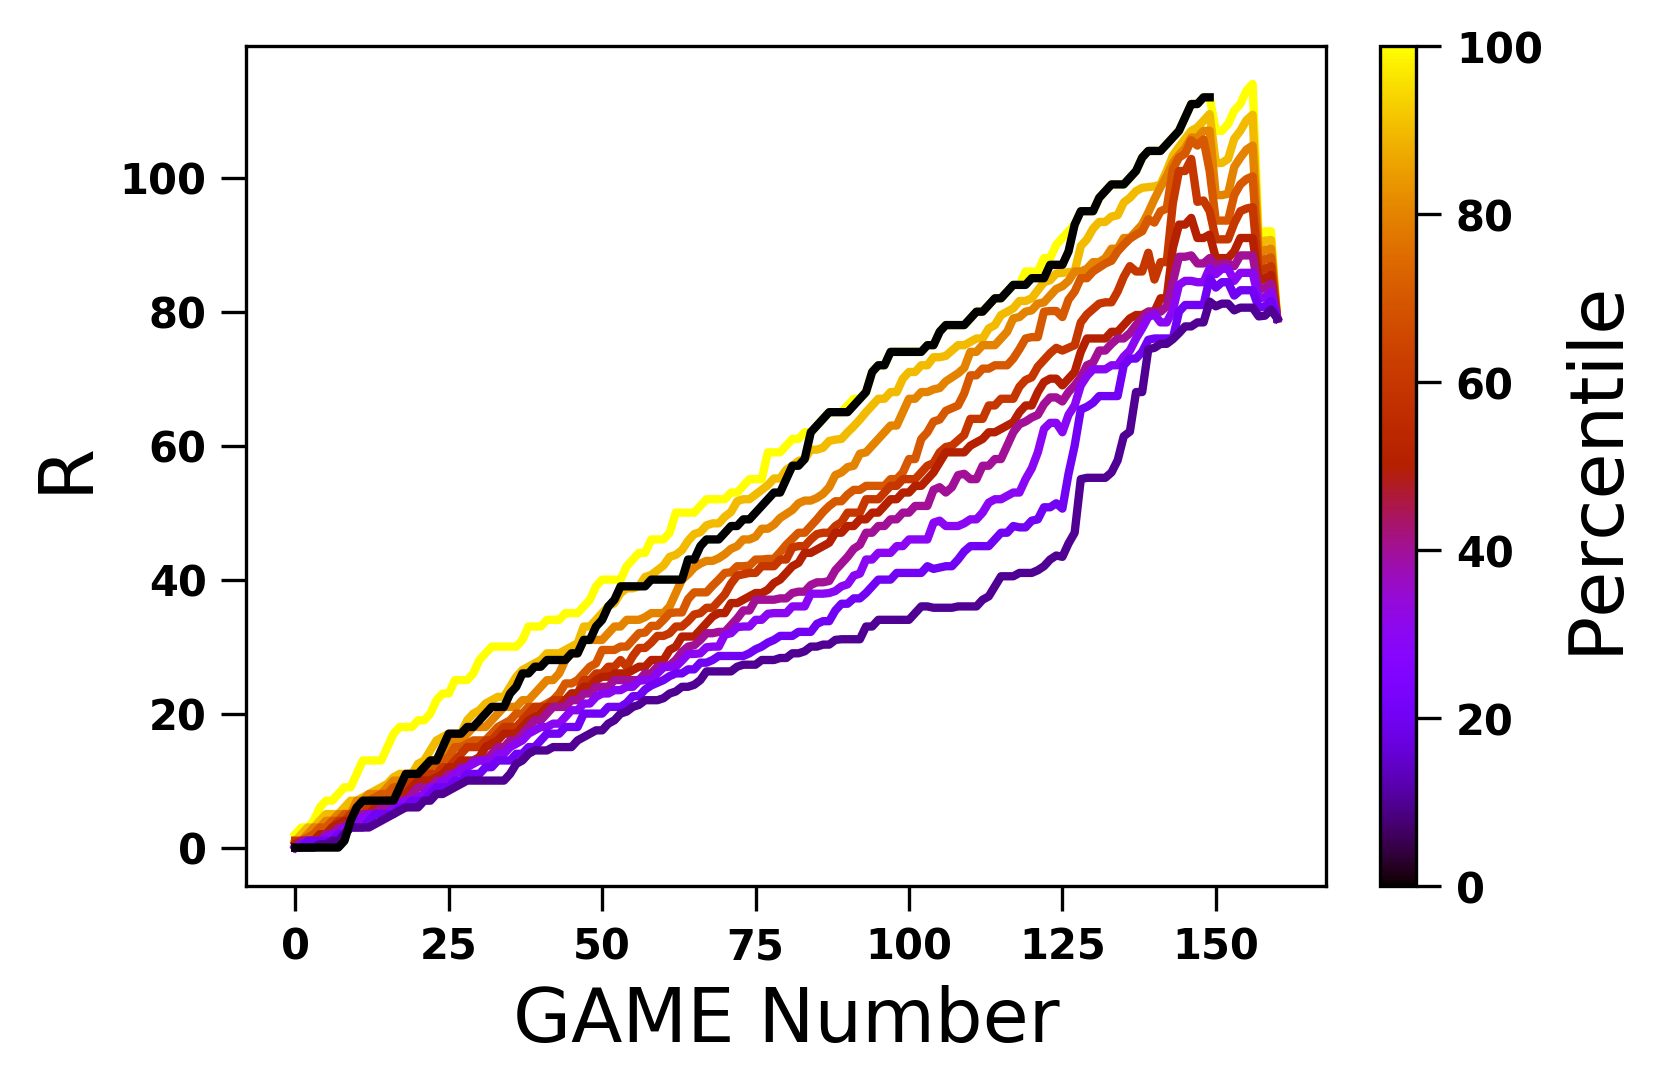

In [52]:

des_pos = '2B'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 50:
        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day])



stat = 'R'
#print(len(np.array(DDStats[stat].keys())) )

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])


fig = plt.figure()
ax = fig.add_axes([0.18,0.22,0.6,0.7])
ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
for perc in range(100,0,-10):
    ax.plot(np.nanpercentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))
    

ax.plot(np.cumsum(GStats[stat]['Jose Altuve']),color='black')

    
ax.set_ylabel(stat,size=18)
ax.set_xlabel('GAME Number',size=18)
    
cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)


print(np.where(PAlist[:,150] >= 0.))


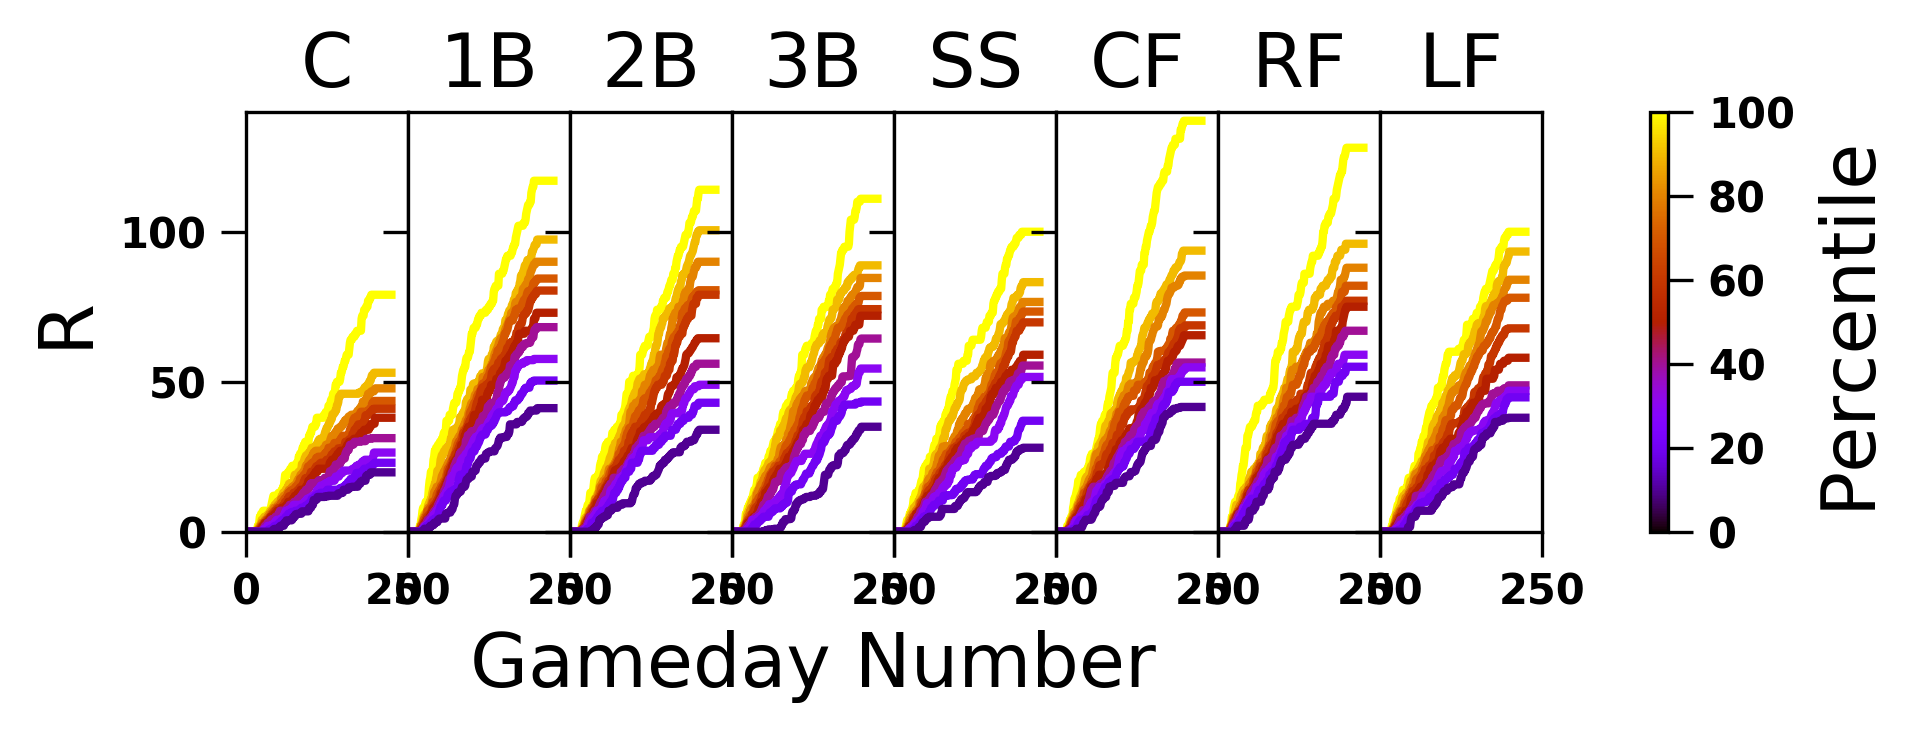

In [23]:

fig = plt.figure(figsize=(6,2))

for indx1,des_pos in enumerate(np.array(['C','1B','2B','3B','SS','CF','RF','LF'])):
    
    ax = fig.add_axes([0.12+(indx1*(0.75-.12)/7.),0.22,(0.75-.12)/7.,0.7])


    plist = []

    for indx,plr in enumerate(DDStats['POS'].keys()):
        
        try:
            if len(np.where(DDStats['POS'][plr] == des_pos)[0]) > 50:
                plist.append(plr)
        except:
            pass


    PAlist = np.zeros([len(plist),max_day-zero_day])



    stat = 'R'
    #print(len(np.array(DDStats[stat].keys())) )

    #for indx,player in enumerate(DDStats[stat].keys()):
    for indx,player in enumerate(np.array(plist)):

        PAlist[indx] = np.cumsum(DDStats[stat][player])






    for perc in range(100,0,-10):
        ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))


    #ax.plot(np.cumsum(DDStats[stat]['Jose Altuve']),color='black')


    if indx1==0: 
        ax.set_ylabel(stat,size=18)
    else:
        ax.set_yticklabels(())
        
    if indx1==3: ax.set_xlabel('Gameday Number',size=18)
    ax.set_title(des_pos,size=18)

    ax.axis([0.0,250.,0.,140.])
    

ax2 = fig.add_axes([0.90,0.22,0.01,0.7])


cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)





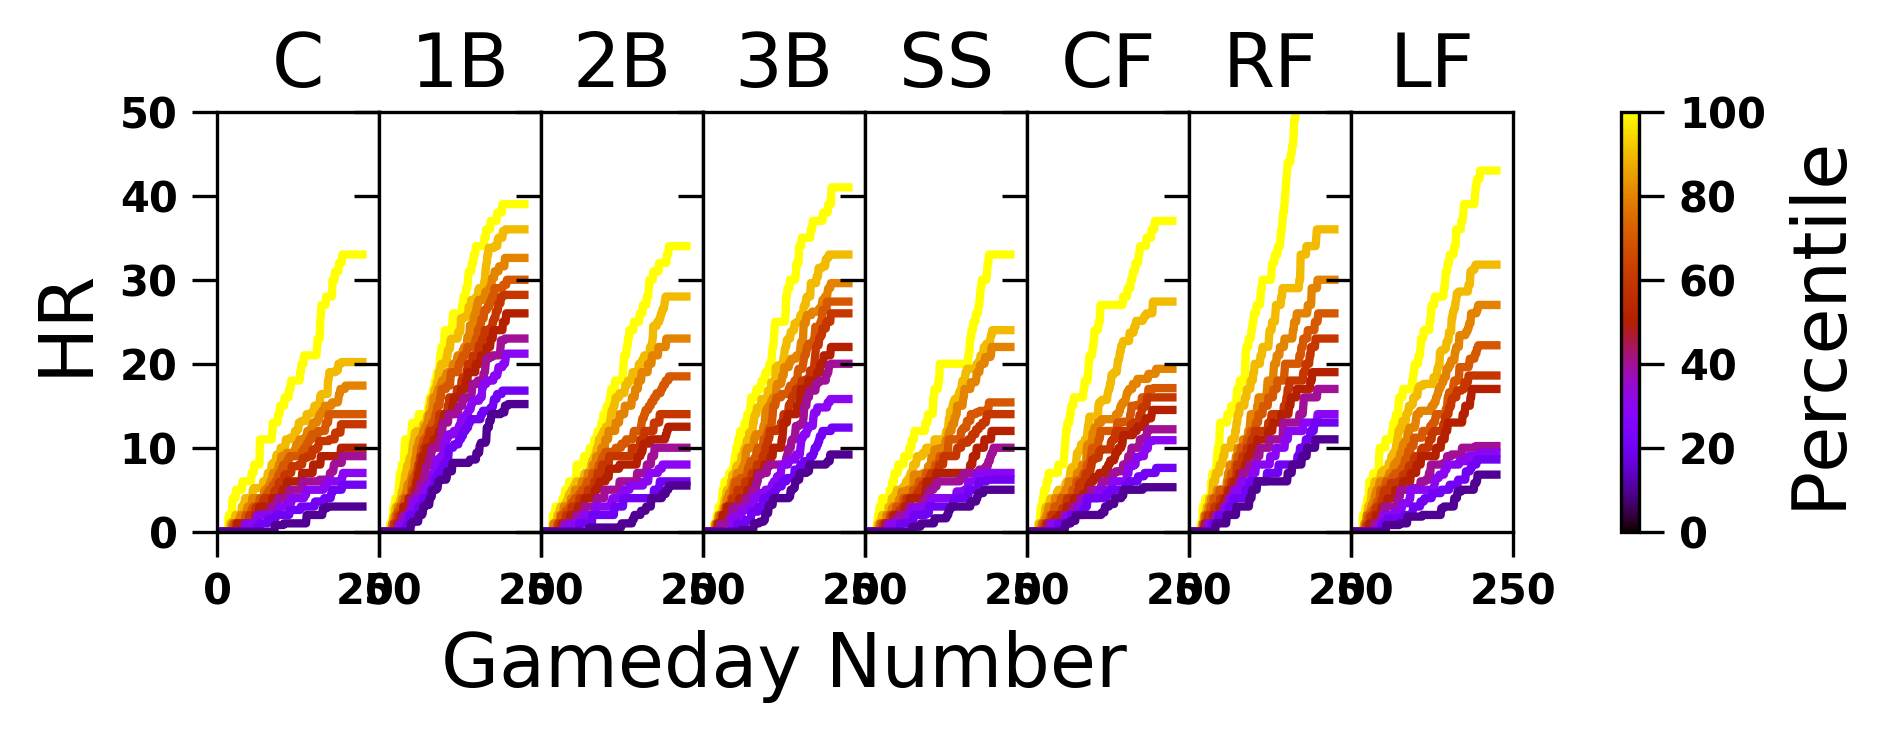

In [24]:

fig = plt.figure(figsize=(6,2))

for indx1,des_pos in enumerate(np.array(['C','1B','2B','3B','SS','CF','RF','LF'])):
    
    ax = fig.add_axes([0.12+(indx1*(0.75-.12)/7.),0.22,(0.75-.12)/7.,0.7])


    plist = []

    for indx,plr in enumerate(DDStats['POS'].keys()):
        
        try:
            if len(np.where(DDStats['POS'][plr] == des_pos)[0]) > 50:
                plist.append(plr)
        except:
            pass


    PAlist = np.zeros([len(plist),max_day-zero_day])



    stat = 'HR'
    #print(len(np.array(DDStats[stat].keys())) )

    #for indx,player in enumerate(DDStats[stat].keys()):
    for indx,player in enumerate(np.array(plist)):

        PAlist[indx] = np.cumsum(DDStats[stat][player])






    for perc in range(100,0,-10):
        ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))


    #ax.plot(np.cumsum(DDStats[stat]['Jose Altuve']),color='black')


    if indx1==0: 
        ax.set_ylabel(stat,size=18)
    else:
        ax.set_yticklabels(())
        
    if indx1==3: ax.set_xlabel('Gameday Number',size=18)
    ax.set_title(des_pos,size=18)

    ax.axis([0.0,250.,0.,50.])
    

ax2 = fig.add_axes([0.90,0.22,0.01,0.7])


cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)






In [46]:
#http://www.fangraphs.com/teams/angels/schedule
    
    

# imports for scraping

from bs4 import BeautifulSoup
import requests

teams = ['angels','astros','athletics','bluejays','braves',\
        'brewers','cardinals','cubs','diamondbacks','dodgers',\
        'giants','indians','mariners','marlins','mets','nationals',\
        'orioles','padres','phillies','pirates','rangers',\
        'rays','reds','redsox','rockies','royals','tigers','twins',\
        'whitesox','yankees']



#
# make hitter dictionary
#
GDict = {}

modict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,'July':7,'Aug':8,'Sep':9,'Oct':10}

for team in teams:
    
    print(team)
    
    get_url = 'http://www.fangraphs.com/teams/'+team+'/schedule'#angels'

    r  = requests.get(get_url)

    data = r.text

    soup = BeautifulSoup(data)

    tables = soup.findAll('table')


    for row in tables[1].find_all("tr")[1:]: 
    
        sav = [td.find('a') for td in row.find_all("td")][0]
        
        #try:
        if 1==1:
            need_url = sav.get('href')
            
            sav2 = [td.get_text() for td in row.find_all("td")]
        
            print(sav2[0].split(',')[0])
            print(modict[(sav2[0].split(',')[0]).split()[0]])
            print((sav2[0].split(',')[0]).split()[1])
            daynum = int((2017,int(modict[(sav2[0].split(',')[0]).split()[0]]), int((sav2[0].split(',')[0]).split()[1]), 0, 0, 0).timetuple().tm_yday)
            
            print(daynum)
            ## Apply a PA cut?
            #if float(sav2[3]) > 0.:
            #    HDict[sav.text] = need_url[(need_url).find('playerid')+9:(need_url).find('&')]
        
        #except:
        #    pass
    
    
'''
f = open('data/gamelogs.dat','w')

for entry in HDict.keys():
    try:
        print >>f,entry,'|',HDict[entry]
    except:
        print entry,'|',HDict[entry]
    

f.close()

'''

angels
Apr 3
4
3


AttributeError: 'tuple' object has no attribute 'timetuple'